# Radon Concentrations in Itakpe Iron Ore Mines And its Environs


This is part of a Masters Physics project that tries to find the radon concentrations of several water samples collected in Itakpe area of Kogi State, Nigeria. The project involves primary data collection at various areas before analysis is made. 
    In this notebook, I try to show using a folium map the areas where data was collected as well as concentration of radon after analysis using a RAD 7 device. Below are import statements used in this notebook. Codes will be explained as you read on.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook



In [67]:
import folium 
import matplotlib.pyplot as plt
import numpy as np
import warnings
from mpl_toolkits import mplot3d
import seaborn as sns
warnings.filterwarnings('ignore')
import pandas as pd

In [3]:
plt.style.use('ggplot')

This is just a path on my machine.

In [3]:
PATH = r"C:\Users\mammanten\Desktop\pwork"

# Importing csv file

In [4]:
df_raw = pd.read_csv(r'C:\Users\mammanten\Desktop\pwork\Itakpe Radon in water.csv', low_memory=False) 
                    

In [5]:
df_raw.head()

,s/n,Sample ID,Run Number,Sample date,sample time,Analysis date,Analysis time,diff in hours,1st Cycle (Bq/L),2nd Cycle (Bq/L),3rd Cycle (Bq/L),4th Cycle (Bq/L),Average Radon Conc (Bq/L),Std. Dev (Bq/L),Decay Correction Factor,Corrected Radon Conc Bq/L,Std. Dev (Bq/L).1,latitude,longitude
0,1,WELL 64,1,NaN,NaN,8-Aug,20:10,30.0,13.2,13.3,18,17,15.3,4.0,1.254311,19.2,4.0,7.640702,6.336958
1,2,WELL 63,2,NaN,NaN,8-Aug,20:46,31.0,26,21,28,29,26.0,5.1,1.263820,32.9,5.1,7.639980,6.336217
2,3,WELL 62,3,NaN,NaN,8-Aug,21:33,32.0,13.9,14.1,17,18,15.9,4.0,1.273402,20.2,4.0,7.639310,6.336482
3,4,WELL 61,4,NaN,NaN,8-Aug,22:21,33.0,14.5,18,20,12.9,15.2,3.9,1.283056,19.5,3.9,7.638832,6.336172
4,5,WELL 60,5,NaN,NaN,9-Aug,11:56,47.0,7.8,4,7,6.1,6.2,2.5,1.426159,8.8,2.5,7.638435,6.335717


<IPython.core.display.Javascript object>


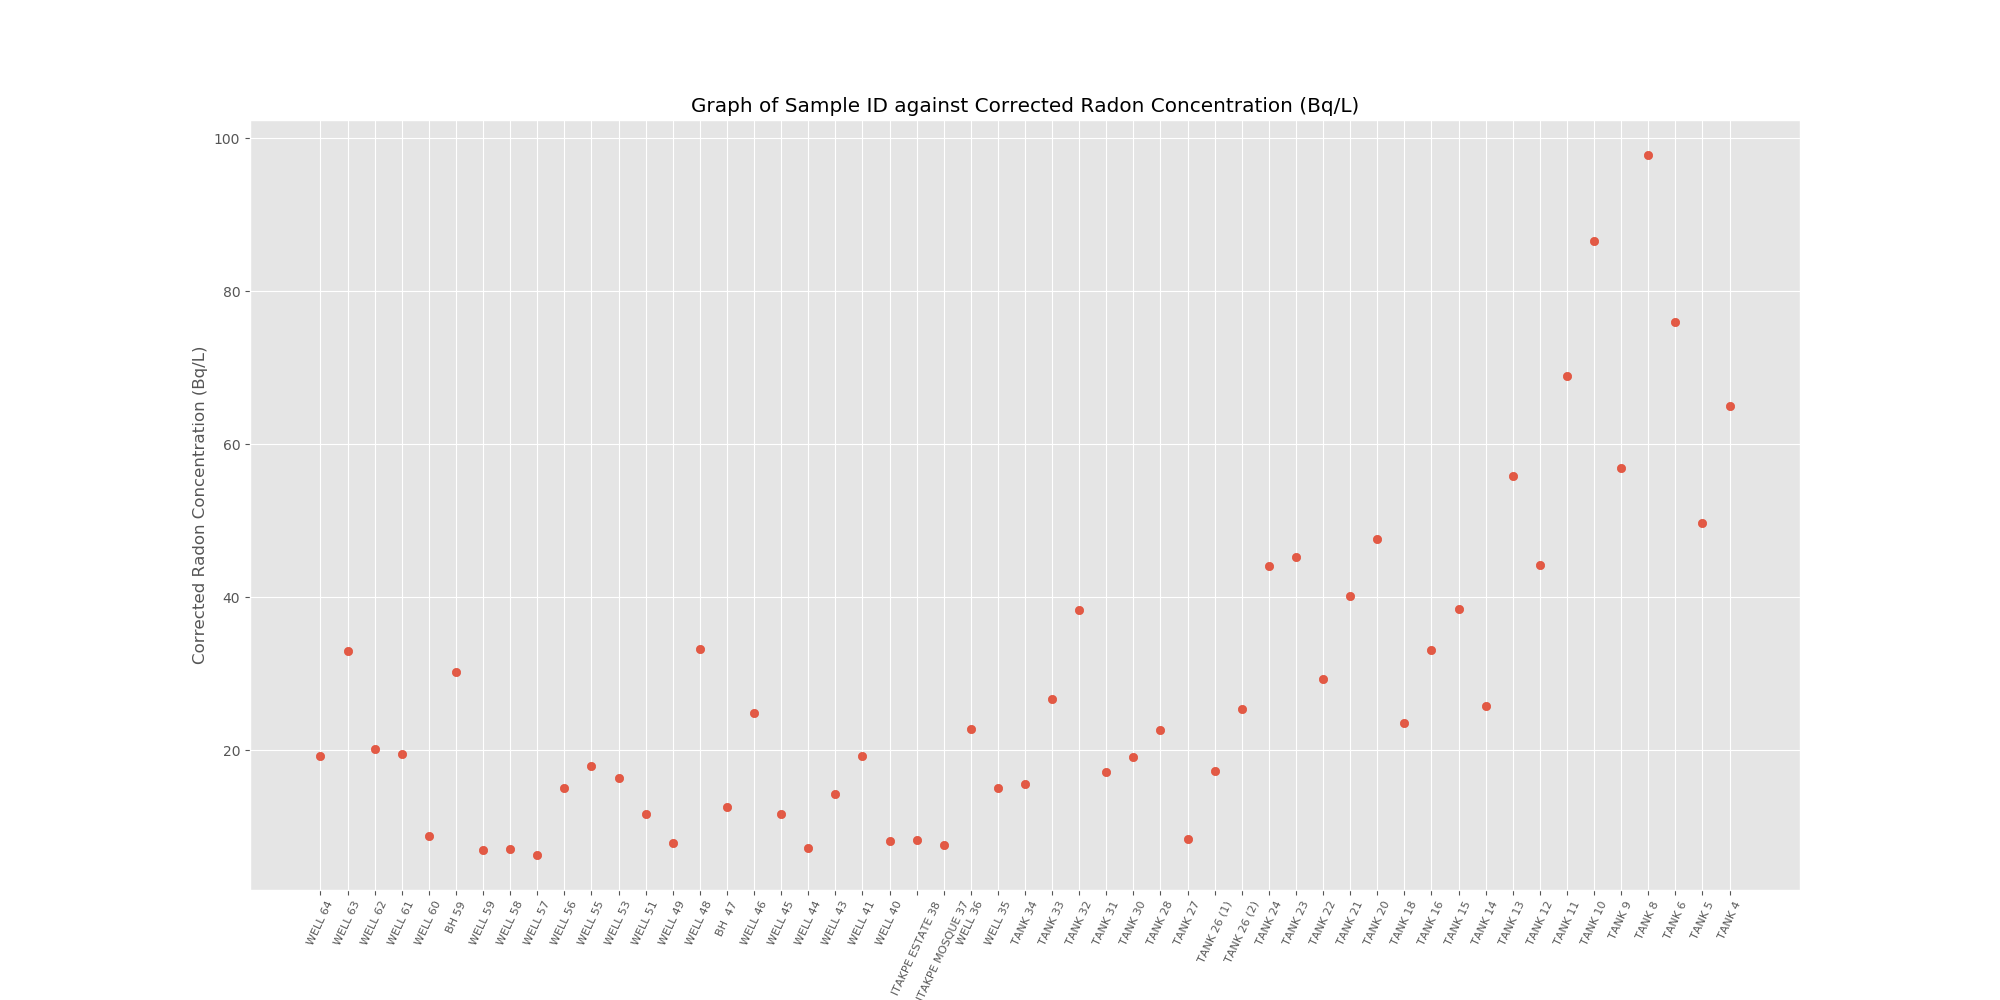

In [107]:
from matplotlib import style
y=df_raw['Corrected Radon Conc Bq/L ']
x=df_raw['Sample ID']
plt.figure(figsize=(20,10))
plt.title('Graph of Sample ID against Corrected Radon Concentration (Bq/L)')
plt.scatter(x, y, alpha=0.9)
plt.ylabel("Corrected Radon Concentration (Bq/L)")
plt.xlabel("Sample ID")
plt.xticks(x,rotation='65', fontsize=8)
plt.show()

<IPython.core.display.Javascript object>


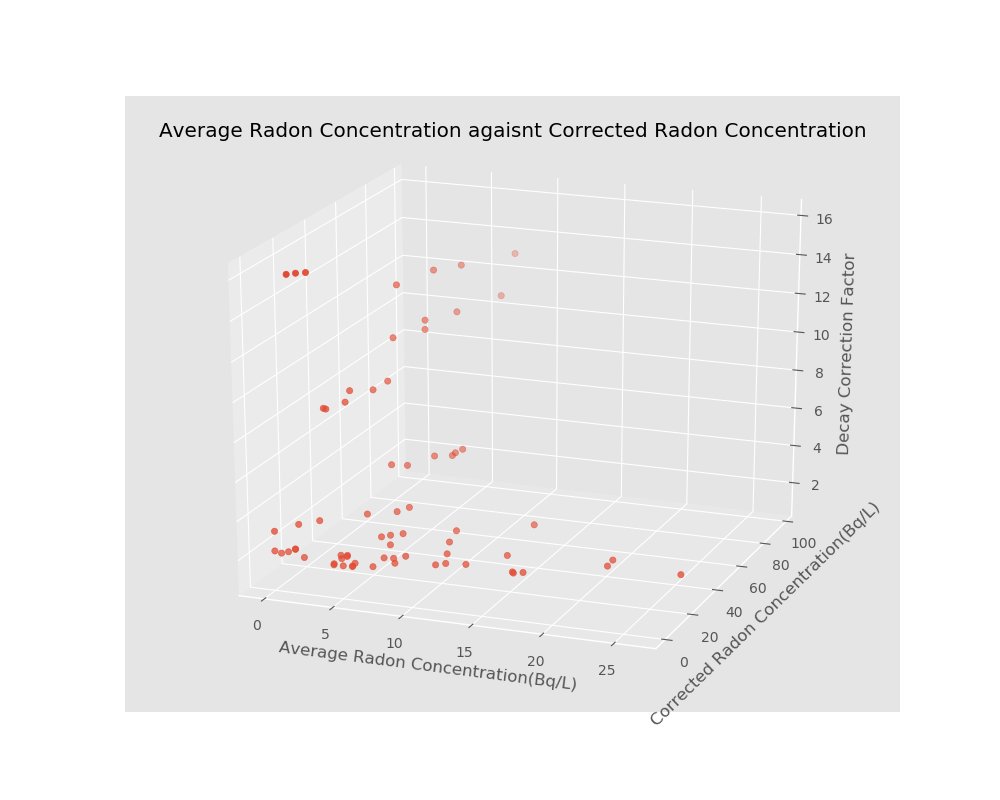

In [7]:
from matplotlib import style
x= df_raw['Average Radon Conc (Bq/L)']
y= df_raw['Corrected Radon Conc Bq/L ']
z=df_raw['Decay Correction Factor']
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
plt.title("Average Radon Concentration agaisnt Corrected Radon Concentration")
ax.scatter3D(x,y,z)
ax.set_xlabel('Average Radon Concentration(Bq/L)')
ax.set_ylabel('Corrected Radon Concentration(Bq/L)')
ax.set_zlabel('Decay Correction Factor')
plt.show()

In [11]:
df_raw = df_raw.fillna(df_raw.mean())

In [13]:
del df_raw['Sample date']

In [14]:
del df_raw['sample time']

In [81]:
df_raw[['1st Cycle (Bq/L)','2nd Cycle (Bq/L)','3rd Cycle (Bq/L)','4th Cycle (Bq/L)']]= df_raw[['1st Cycle (Bq/L)','2nd Cycle (Bq/L)','3rd Cycle (Bq/L)','4th Cycle (Bq/L)']].astype(float, errors='ignore')

In [82]:
df_raw.dropna(inplace=True)

<IPython.core.display.Javascript object>


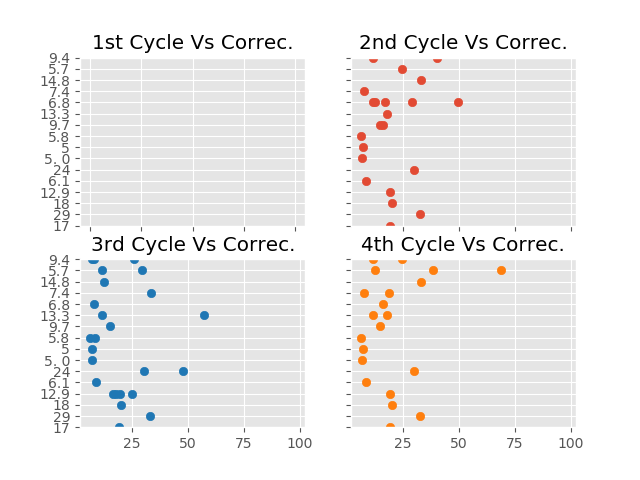

In [106]:

x=df_raw['1st Cycle (Bq/L)']
y=df_raw['2nd Cycle (Bq/L)']
m=df_raw['3rd Cycle (Bq/L)']
l=df_raw['4th Cycle (Bq/L)']
k=df_raw['Corrected Radon Conc Bq/L ']

fig, axs = plt.subplots(2,2, sharey=True)
axs[0,0].scatter(k, x, color='tab:green')
axs[0,0].set_title('1st Cycle Vs Correc.')
axs[0,1].scatter(k,y)
axs[0,1].set_title('2nd Cycle Vs Correc.')
axs[1,0].scatter(k,m, color='tab:blue')
axs[1,0].set_title('3rd Cycle Vs Correc.')
axs[1,1].scatter(k,l, color='tab:orange')
axs[1,1].set_title('4th Cycle Vs Correc.')

for ax in axs.flat:
    ax.set(xlabel='', ylabel='')
for ax in axs.flat:
    ax.label_outer()
for ax in axs.flat:
    ax.set_ylim(0, 15)
plt.show()

## For simplicity, certain column names were renamed as the brackets may pose problems while working with the folium library

In [12]:
df_raw.rename(columns={'1st Cycle (Bq/L)':'1st Cyle Bq/L','2nd Cycle (Bq/L)':'2nd Cycle Bq/L',
                      '3rd Cycle (Bq/L)': '3rd Cycle Bq/L', '4th Cycle (Bq/L)':'4th Cycle Bq/L'}, inplace=True)

display_all is a simple function that shows all values present in the dataframe. It extremely useful as dataframes can be 
inspected much faster and with ease too.  

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
df_raw.info(display_all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 19 columns):
s/n                           70 non-null int64
Sample ID                     70 non-null object
Run Number                    64 non-null object
Sample date                   0 non-null float64
sample time                   0 non-null float64
Analysis date                 70 non-null object
Analysis time                 69 non-null object
diff in hours                 68 non-null float64
1st Cycle (Bq/L)              70 non-null object
2nd Cycle (Bq/L)              69 non-null object
3rd Cycle (Bq/L)              69 non-null object
4th Cycle (Bq/L)              69 non-null object
Average Radon Conc (Bq/L)     69 non-null float64
Std. Dev (Bq/L)               69 non-null float64
Decay Correction Factor       69 non-null float64
Corrected Radon Conc Bq/L     69 non-null float64
Std. Dev (Bq/L).1             69 non-null float64
latitude                      69 non-null float64
longitude

For a quick clean up of data, the mean of each column was taken and used to fill any missing data. 

In [10]:
df_raw

,s/n,Sample ID,Run Number,Sample date,sample time,Analysis date,Analysis time,diff in hours,1st Cycle (Bq/L),2nd Cycle (Bq/L),3rd Cycle (Bq/L),4th Cycle (Bq/L),Average Radon Conc (Bq/L),Std. Dev (Bq/L),Decay Correction Factor,Corrected Radon Conc Bq/L,Std. Dev (Bq/L).1,latitude,longitude
0,1,WELL 64,1,NaN,NaN,8-Aug,20:10,30.0,13.2,13.3,18,17,15.30,4.0,1.254311,19.20,4.0,7.640702,6.336958
1,2,WELL 63,2,NaN,NaN,8-Aug,20:46,31.0,26,21,28,29,26.00,5.1,1.263820,32.90,5.1,7.639980,6.336217
2,3,WELL 62,3,NaN,NaN,8-Aug,21:33,32.0,13.9,14.1,17,18,15.90,4.0,1.273402,20.20,4.0,7.639310,6.336482
3,4,WELL 61,4,NaN,NaN,8-Aug,22:21,33.0,14.5,18,20,12.9,15.20,3.9,1.283056,19.50,3.9,7.638832,6.336172
4,5,WELL 60,5,NaN,NaN,9-Aug,11:56,47.0,7.8,4,7,6.1,6.20,2.5,1.426159,8.80,2.5,7.638435,6.335717
5,6,BH 59,6,NaN,NaN,9-Aug,12:42,48.0,19,27,13.9,24,21.00,4.6,1.436971,30.20,4.6,7.639558,6.334937
6,7,WELL 59,7,NaN,NaN,9-Aug,13:25,48.0,4.8,5.9,4.9,5. 0,4.90,2.2,1.436971,7.00,2.2,7.639272,6.334747
7,8,WELL 58,8,NaN,NaN,9-Aug,14:08,49.0,4.8,3.9,5.8,5,4.90,2.2,1.447866,7.10,2.2,7.638448,6.334418
8,9,WELL 57,9,NaN,NaN,9-Aug,14:55,50.0,3.8,5.7,1.9,5.8,4.30,2.0,1.458843,6.30,2.0,7.639223,6.334185
9,10,WELL 56,10,NaN,NaN,9-Aug,17:28,52.0,7.6,9.5,13.4,9.7,10.10,3.1,1.481047,15.00,3.1,7.638945,6.333545


In [15]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

1st Cyle Bq/L                 0.000000
2nd Cycle Bq/L                0.014286
3rd Cycle Bq/L                0.014286
4th Cycle Bq/L                0.014286
Analysis date                 0.000000
Analysis time                 0.014286
Average Radon Conc (Bq/L)     0.000000
Corrected Radon Conc Bq/L     0.000000
Decay Correction Factor       0.000000
Run Number                    0.085714
Sample ID                     0.000000
Std. Dev (Bq/L)               0.000000
Std. Dev (Bq/L).1             0.000000
diff in hours                 0.000000
latitude                      0.000000
longitude                     0.000000
s/n                           0.000000
dtype: float64

In [113]:
df_raw['Corrected Radon Conc Bq/L '] = df_raw['Corrected Radon Conc Bq/L '].astype(str)

In [114]:
display_all(df_raw)

,s/n,Sample ID,Run Number,Analysis date,Analysis time,diff in hours,1st Cycle (Bq/L),2nd Cycle (Bq/L),3rd Cycle (Bq/L),4th Cycle (Bq/L),Average Radon Conc (Bq/L),Std. Dev (Bq/L),Decay Correction Factor,Corrected Radon Conc Bq/L,Std. Dev (Bq/L).1,latitude,longitude
0,1,WELL 64,1,8-Aug,20:10,30.0,NaN,13.3,18,17,15.3,4.0,1.254311,19.2,4.0,7.640702,6.336958
1,2,WELL 63,2,8-Aug,20:46,31.0,NaN,21,28,29,26.0,5.1,1.263820,32.9,5.1,7.639980,6.336217
2,3,WELL 62,3,8-Aug,21:33,32.0,NaN,14.1,17,18,15.9,4.0,1.273402,20.2,4.0,7.639310,6.336482
3,4,WELL 61,4,8-Aug,22:21,33.0,NaN,18,20,12.9,15.2,3.9,1.283056,19.5,3.9,7.638832,6.336172
4,5,WELL 60,5,9-Aug,11:56,47.0,NaN,4,7,6.1,6.2,2.5,1.426159,8.8,2.5,7.638435,6.335717
5,6,BH 59,6,9-Aug,12:42,48.0,NaN,27,13.9,24,21.0,4.6,1.436971,30.2,4.6,7.639558,6.334937
6,7,WELL 59,7,9-Aug,13:25,48.0,NaN,5.9,4.9,5. 0,4.9,2.2,1.436971,7.0,2.2,7.639272,6.334747
7,8,WELL 58,8,9-Aug,14:08,49.0,NaN,3.9,5.8,5,4.9,2.2,1.447866,7.1,2.2,7.638448,6.334418
8,9,WELL 57,9,9-Aug,14:55,50.0,NaN,5.7,1.9,5.8,4.3,2.0,1.458843,6.3,2.0,7.639223,6.334185
9,10,WELL 56,10,9-Aug,17:28,52.0,NaN,9.5,13.4,9.7,10.1,3.1,1.481047,15.0,3.1,7.638945,6.333545


# Folium Map


The folium map is created and the mean of both the latitude and longitude is take.This is done 
so as to have the map begin at a reasonably central location. That said, the view will not stray 
so far from the marker locations 

In [115]:
m = folium.Map(location = [df_raw['latitude'].mean(),
                           df_raw['longitude'].mean()], 
               zoom_start=16, tiles='OpenStreetMap')

In [116]:
fg = folium.FeatureGroup(name='Radiation Locations')          

A for loop is created so as to loop through each location and display the calculated Radon concentration using 
popup from folium. zip was used for iteration as it is much faster than the basic iteration method.

In [121]:
for lat, long, correctedconc, sampleID in zip(df_raw['latitude'],
    df_raw['longitude'],df_raw['Corrected Radon Conc Bq/L '],df_raw['Sample ID']):
    fg.add_child(folium.Marker(location=[lat,long],popup=(folium.Popup(correctedconc + " Bq/L")), icon=folium.Icon(color='blue', icon='download', prefix='fa'), tooltip = sampleID))
   
                 

In [122]:
m.add_child(fg)

Finally, the file is saved as a html file which can be viewed at a later date

In [123]:
m.save(outfile='Itakpe Radon Locations.html')